In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import reverse_geocoder as rg
import pprint 
from pygeocoder import Geocoder

In [2]:
#https://www.kaggle.com/aakashnain/eda-nytaxi
train=pd.read_csv('train/train.csv')
test=pd.read_csv('test/test.csv')

In [3]:
train.info()        # No Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [4]:
print('Total number of training samples are : ', train.shape[0])
print('Total number of testing samples are : ', test.shape[0])

Total number of training samples are :  1458644
Total number of testing samples are :  625134


In [5]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
nameofdays={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [7]:
'''Perform Feature Engineering'''
#train['pickup_datetime']=train['pickup_datetime'].apply(lambda x:pd.to_datetime(x))

train['pickup_datetime']=pd.to_datetime(train['pickup_datetime'])     #This approach is very fast as compared to the above one
train['dropoff_datetime']=pd.to_datetime(train['dropoff_datetime'])     

train['Hour']=train.pickup_datetime.dt.hour
train['Month']=train.pickup_datetime.dt.month
train['Day']=train.pickup_datetime.dt.dayofweek
train['DayName']=train.Day.map(nameofdays)

  # Lets Start with EDA

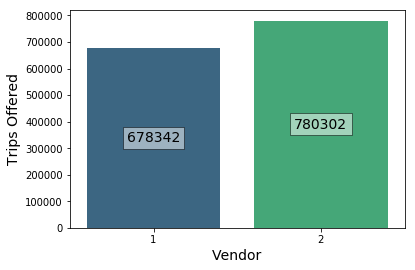

In [19]:
ax=plt.figure()
ax=sns.countplot(x='vendor_id',data=train,palette='viridis')
plt.ylabel('Trips Offered',fontsize=14)
plt.xlabel('Vendor',fontsize=14)
for i in ax.patches:
    x,y=i.xy
    w=i.get_width()
    h=i.get_height()
    plt.text(x=x+w/2,y=h.max()*1/2,s=h,fontsize=14,horizontalalignment='center',verticalalignment='center',bbox=dict(facecolor='w', alpha=0.5))
    


In [20]:
print('Total Percentage of Vendor=1 is {:0f}%'.format((train[train['vendor_id']==1].vendor_id.count()/train.vendor_id.count())*100))
print('Total Percentage of Vendor=2 is {:0f}%'.format((train[train['vendor_id']==2].vendor_id.count()/train.vendor_id.count())*100))
'''Now will check how to have a percentage graph instead of a countplot?????'''


Total Percentage of Vendor=1 is 46.504973%
Total Percentage of Vendor=2 is 53.495027%


'Now will check how to have a percentage graph instead of a countplot?????'

In [21]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Hour,Month,Day,DayName
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,3,0,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,6,6,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,1,1,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,4,2,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,3,5,Saturday


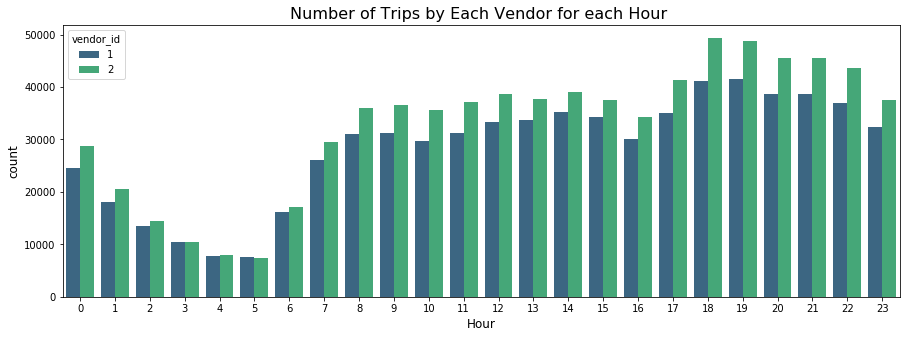

In [22]:
plt.figure(figsize=(15,5))
plt.ylabel('Number of Trips',fontsize=12)
plt.xlabel('Hours',fontsize=12)
plt.title('Number of Trips by Each Vendor for each Hour ',fontsize=16)
sns.countplot(x='Hour',data=train,palette='viridis',hue='vendor_id')


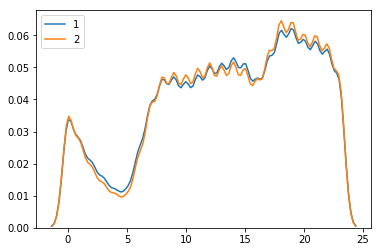

In [27]:
ax=sns.kdeplot(train[train['vendor_id']==1]['Hour'],label='1')
ax=sns.kdeplot(train[train['vendor_id']==2]['Hour'],label='2')


'How to cange the order without changing the values'

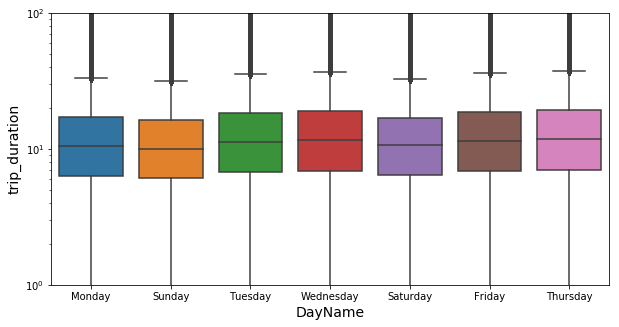

In [29]:
ax=plt.figure(figsize=(10,5))
bo=train.trip_duration/60

plt.yscale('log')
plt.ylim([1,100])

plt.ylabel('Trip Duration in Mins(Logarithmic)',fontsize=14)
plt.xlabel('Day',fontsize=14)

ax=sns.boxplot(x='DayName',y=bo,data=train) 
'''How to cange the order without changing the values'''

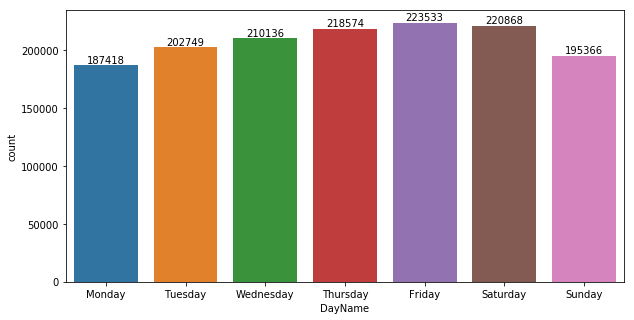

In [55]:
ax=plt.figure(figsize=(10,5))
plt.tight_layout()
ax=sns.countplot(x='DayName',data=train,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
for i in ax.patches:
    x,y=i.xy
    w=i.get_width()
    h=i.get_height()
    plt.text(x=x+w/2,y=h*1.022,s=h,horizontalalignment='center',verticalalignment='center')

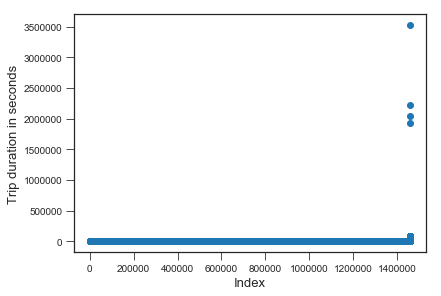

In [61]:
'''Lets check for any outlier with trip duration '''
plt.figure(figsize=(6,4))
plt.scatter(x=train.trip_duration.index,y=train.trip_duration.sort_values(),data=train)
#plt.scatter(x=range(len(train.trip_duration)),y=train.trip_duration.sort_values())      OTHER WAY OF SOLVING
plt.tight_layout()
plt.xlabel('Index',fontsize=13)
plt.ylabel('Trip duration in seconds',fontsize=13)
ax=sns.set_style("ticks",{"xtick.major.size": 8, "ytick.major.size": 8})

'''
Here we do observe outliers but still there might be many outliers which can't be seen since the range is big.
So next we will using log 
'''


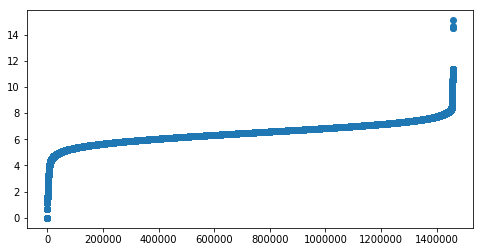

In [62]:
'''Log Plot to see if there are any further outliers since the range/variance was a lot'''
plt.figure(figsize=(8,4))
plt.tight_layout()
plt.scatter(x=train.trip_duration.index,y=np.log(train.trip_duration.sort_values()))

Text(0.5,1,'Dropoff Longitude')

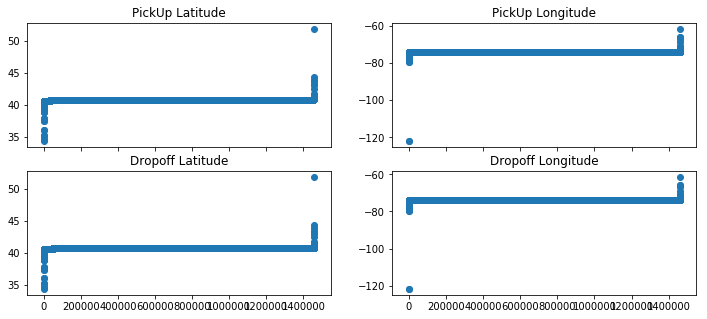

In [65]:
fig,ax=plt.subplots(2,2,sharex=True,figsize=(12,5))


ax[0,0].scatter(x=range(len(train.pickup_latitude)),y=train.pickup_latitude.sort_values(),data=train)
ax[0,1].scatter(x=range(len(train.pickup_longitude)),y=train.pickup_longitude.sort_values(),data=train)
ax[1,0].scatter(x=range(len(train.dropoff_latitude)),y=train.pickup_latitude.sort_values(),data=train)
ax[1,1].scatter(x=range(len(train.dropoff_longitude)),y=train.pickup_longitude.sort_values(),data=train)
ax[0,0].set_title('PickUp Latitude')
ax[0,1].set_title('PickUp Longitude')
ax[1,0].set_title('Dropoff Latitude')
ax[1,1].set_title('Dropoff Longitude')              #Change the position of the title if possible?????

There are few outliers as we see in the above plot.So we will drop them. Also find if there is a better way to have a subplot

In [63]:
train.sort_values('trip_duration',ascending=False).head(100)
'''
We observe there are few records where trip duration is huge so let's 
check the disance of that trip and then decide to keep or ignore it 
'''

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Hour,Month,Day,DayName
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282,22,2,5,Saturday
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612,6,1,1,Tuesday
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578,22,2,5,Saturday
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736,0,1,1,Tuesday
1234291,id1942836,2,2016-02-15 23:18:06,2016-02-16 23:17:58,2,-73.794525,40.644825,-73.991051,40.755573,N,86392,23,2,0,Monday
295382,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,N,86391,13,5,1,Tuesday
73816,id0953667,2,2016-05-06 00:00:10,2016-05-07 00:00:00,1,-73.996010,40.753220,-73.979027,40.740601,N,86390,0,5,4,Friday
59891,id2837671,2,2016-06-30 16:37:52,2016-07-01 16:37:39,1,-73.992279,40.749729,-73.962524,40.800770,N,86387,16,6,3,Thursday
1360439,id1358458,2,2016-06-23 16:01:45,2016-06-24 16:01:30,1,-73.782089,40.644806,-73.985016,40.666828,N,86385,16,6,3,Thursday
753765,id2589925,2,2016-05-17 22:22:56,2016-05-18 22:22:35,4,-74.006111,40.734680,-73.958809,40.815449,N,86379,22,5,1,Tuesday



# Next we calculate the distance based on Latitude and Longitude

In [69]:
from math import sin, cos, sqrt, atan2, radians

In [70]:
def dist(x):
    R = 6373.0
    
    lat1 = radians(x[0])
    lon1 = radians(x[1])
    lat2 = radians(x[2])
    lon2 = radians(x[3])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    distance_mile=distance/1.60934
    return distance_mile


In [71]:
df=train[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']]
train['Distance']=df.apply(dist,axis=1)

In [72]:
train.sort_values('Distance')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Hour,Month,Day,DayName,Distance
466799,id2551005,2,2016-05-14 22:13:52,2016-05-14 22:17:31,1,-73.982330,40.742901,-73.982330,40.742901,N,219,22,5,5,Saturday,0.000000
212128,id1600053,2,2016-02-23 05:28:43,2016-02-23 05:31:44,4,-73.978851,40.728119,-73.978851,40.728119,N,181,5,2,1,Tuesday,0.000000
821598,id0401568,2,2016-01-19 13:03:27,2016-01-19 13:13:19,1,-73.951279,40.770721,-73.951279,40.770721,N,592,13,1,1,Tuesday,0.000000
271721,id0953607,2,2016-04-30 20:58:22,2016-04-30 21:03:09,1,-73.998550,40.757561,-73.998550,40.757561,N,287,20,4,5,Saturday,0.000000
1411622,id0487060,1,2016-02-25 19:36:53,2016-02-25 19:37:36,1,-74.040390,40.736027,-74.040390,40.736027,N,43,19,2,3,Thursday,0.000000
750030,id3949127,1,2016-05-25 14:16:52,2016-05-25 14:32:24,1,-73.985336,40.755459,-73.985336,40.755459,N,932,14,5,2,Wednesday,0.000000
325094,id1278049,1,2016-01-09 23:40:16,2016-01-09 23:52:01,1,-73.964264,40.797325,-73.964264,40.797325,N,705,23,1,5,Saturday,0.000000
389655,id1086071,1,2016-02-10 09:05:55,2016-02-10 09:06:22,1,-73.935890,40.740372,-73.935890,40.740372,N,27,9,2,2,Wednesday,0.000000
1013690,id3515368,1,2016-06-14 07:58:28,2016-06-14 07:58:30,1,-73.958374,40.598701,-73.958374,40.598701,N,2,7,6,1,Tuesday,0.000000
361531,id3108338,2,2016-02-27 15:13:10,2016-02-27 15:15:57,1,-73.984764,40.739296,-73.984764,40.739296,N,167,15,2,5,Saturday,0.000000


In [87]:
'''           The Other way of calculating the Distance using the Python Library'''
from geopy.distance import geodesic
A=(40.758633,-73.972366)
B=(43.674000,-79.553535)
print(round(geodesic(A,B).miles))
print(round(dist([40.758633,-73.972366,43.674000,-79.553535])))
'''The values are a bit different so rounded them '''

350
349


'The values are a bit different so rounded them '

In [81]:
'''Lets see if the distance is also a lot for large trip duration'''
train.sort_values(by='trip_duration',ascending=False)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Hour,Month,Day,DayName,Distance
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282,22,2,5,Saturday,12.369610
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612,6,1,1,Tuesday,1.016343
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578,22,2,5,Saturday,3.718521
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736,0,1,1,Tuesday,12.523761
1234291,id1942836,2,2016-02-15 23:18:06,2016-02-16 23:17:58,2,-73.794525,40.644825,-73.991051,40.755573,N,86392,23,2,0,Monday,12.830852
295382,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,N,86391,13,5,1,Tuesday,13.125712
73816,id0953667,2,2016-05-06 00:00:10,2016-05-07 00:00:00,1,-73.996010,40.753220,-73.979027,40.740601,N,86390,0,5,4,Friday,1.245575
59891,id2837671,2,2016-06-30 16:37:52,2016-07-01 16:37:39,1,-73.992279,40.749729,-73.962524,40.800770,N,86387,16,6,3,Thursday,3.856145
1360439,id1358458,2,2016-06-23 16:01:45,2016-06-24 16:01:30,1,-73.782089,40.644806,-73.985016,40.666828,N,86385,16,6,3,Thursday,10.748433
753765,id2589925,2,2016-05-17 22:22:56,2016-05-18 22:22:35,4,-74.006111,40.734680,-73.958809,40.815449,N,86379,22,5,1,Tuesday,6.106712


So just for 12 miles of distance the trip is taking approximately 98 Hours (1st Row).So this is definitely an outlier/noise.Similarly we can observe many such records.So wewill drop such records when training our model.

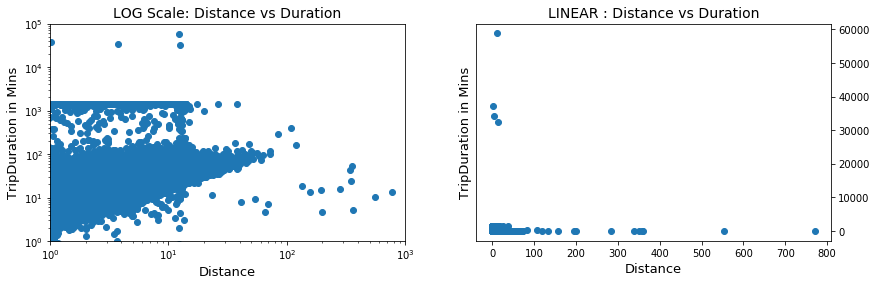

In [97]:
'''Lets check it by plotting a graph'''
fig=plt.figure(figsize=(14,4))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.scatter(x='Distance',y=train.trip_duration/60,data=train)
ax1.set_title('LOG Scale: Distance vs Duration',fontsize=14)
ax1.set_xlabel('Distance',fontsize=13)
ax1.set_ylabel('TripDuration in Mins',fontsize=13)
ax1.set_xscale('Log')
ax1.set_xlim([1,1000])
ax1.set_yscale('Log')
ax1.set_ylim([1,100000])

ax2.scatter(x='Distance',y=train.trip_duration/60,data=train)
ax2.set_title('LINEAR : Distance vs Duration',fontsize=14)
ax2.set_xlabel('Distance',fontsize=13)
ax2.set_ylabel('TripDuration in Mins',fontsize=13)
ax2.yaxis.set_ticks_position('right')




We observe that there are few outliers.There are few data points where the Distance is > 100 miles but the duration is less than a minute and vice versa as well. So when we train our model we will get rid of such data points. 

Text(0,0.5,'Log [Duration] in Mins ')

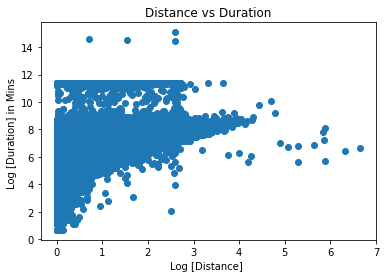

In [108]:
plt.scatter(x=np.log(train['Distance']+1),y=np.log(train['trip_duration']+1),data=train)
plt.title('Distance vs Duration')
plt.xlabel('Log [Distance] ')
plt.ylabel('Log [Duration] in Mins ')

Check the negative values of the log with actual values? It was showing us negative values because we had 0 as the distance so we add +1 to avoid getting negative values

# We will fetch the city name from the Latitude and Longitude columns.

In [128]:
import reverse_geocoder as rg    #Fetch City Name from the Longitude and Latitude
def getloc(x):
    s=(x[0],x[1])
    d=(x[2],x[3])
    source=rg.search(s)
    destination=rg.search(d)
    for i,j in zip(source,destination):
        source_loc=list(i.values())[2]
        destination_loc=list(j.values())[2]
        return pd.Series([source_loc,destination_loc])       #When returning more than 1 value 
    

In [129]:
df_cityname=df.copy().head(10)
df_cityname[['source','destination']]=df_cityname.apply(getloc,axis=1)

In [127]:
df_cityname

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,source,destination
0,40.767937,-73.982155,40.765602,-73.964630,Manhattan,Manhattan
1,40.738564,-73.980415,40.731152,-73.999481,Long Island City,New York City
2,40.763939,-73.979027,40.710087,-74.005333,Manhattan,New York City
3,40.719971,-74.010040,40.706718,-74.012268,New York City,New York City
4,40.793209,-73.973053,40.782520,-73.972923,Manhattan,Manhattan
5,40.742195,-73.982857,40.749184,-73.992081,Long Island City,Weehawken
6,40.757839,-73.969017,40.765896,-73.957405,Long Island City,Manhattan
7,40.797779,-73.969276,40.760559,-73.922470,Manhattan,Long Island City
8,40.738400,-73.999481,40.732815,-73.985786,New York City,New York City
9,40.744339,-73.981049,40.789989,-73.973000,Long Island City,Manhattan


Not an accurate technique

rg.search returns an Ordered Dictionary and we have to fetch values in a different way.
How to fetch value from Ordered Dictionary.  
Will show an example*

    

In [141]:
a=rg.search((40.749851, -73.990723))
for i in a:
    #print(i)            #This is an Ordered Dictionary
    values=i.values()
    keys=i.keys()
print(list(values)) #This will be a List.So after it is a list we can fetch in a similar way as we used to do-> list(values)[2]
print(list(keys))



print(list(values)[2])
#Other Technique where you are specific to fetch a value based on the keys
for x,y in zip(keys,values):
        if x=='name':
            print(y)

['40.76955', '-74.02042', 'Weehawken', 'New Jersey', 'Hudson County', 'US']
['lat', 'lon', 'name', 'admin1', 'admin2', 'cc']
Weehawken
Weehawken


# Try to plot by using different maps capability

In [78]:
west, south, east, north = -74.03, 40.63, -73.77, 40.85

train = train[(train.pickup_latitude> south) & (train.pickup_latitude < north)]
train = train[(train.dropoff_latitude> south) & (train.dropoff_latitude < north)]
train = train[(train.pickup_longitude> west) & (train.pickup_longitude < east)]
train = train[(train.dropoff_longitude> west) & (train.dropoff_longitude < east)]

Simple Scatter plot 

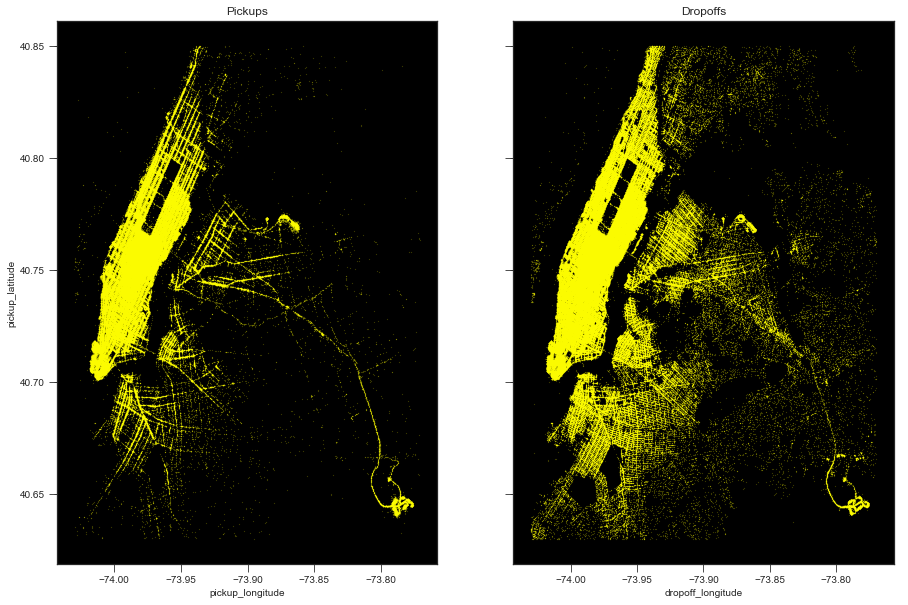

In [79]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))

train.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='yellow', 
                s=.02,alpha=.6,subplots=True, ax=ax1)
ax1.set_title("Pickups")
ax1.set_facecolor('black')

train.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Dropoffs")
ax2.set_facecolor('black') 


In [80]:
import folium
from folium.plugins import MarkerCluster

In [81]:
def Loc_Name(x):
    a=rg.search(x)
    for i in a:
        values=i.values()
        Location_Name=(list(values)[2])
    return Location_Name

In [82]:
height=300
width=900
location=[40.770779, -74.017616]
maps=folium.Map([40.749851, -73.990723],zoom_start=12,width=width,height=height)
folium.Marker(location,popup=Loc_Name(location),icon=folium.Icon(color='red',angle=45)).add_to(maps)
maps
#The maps icon and the location that it returns is different.Don't know which one is correct????

In [83]:
len(train['pickup_latitude'])

1438626

In [84]:
map_loc=train[['pickup_latitude','pickup_longitude']].head(10)
list(map_loc.iloc[1])
range(len(map_loc['pickup_latitude']))

range(0, 10)

In [85]:
for i in range(len(map_loc['pickup_latitude'])):
    folium.Marker(list(map_loc.iloc[i])).add_to(maps)   #It has to be a list*****
maps

In [86]:
map2=folium.Map([40.749851, -73.990723],zoom_start=12)
marker_cluster = MarkerCluster().add_to(map2)
for i in range(len(map_loc['pickup_latitude'])):
    folium.Marker(list(map_loc.iloc[i])).add_to(marker_cluster)
map2